## Introduction

**Objective:**

The Fashion-MNIST dataset by Zalando made in 2017 consists of 70 thousand 28x28 images of clothing under 10 categories. It provides a more challenging classification task than the handwritten digits identification task of MNIST dataset from 1994.

Our goal here will be to build data preprocessing pipeline and a fine-tuned ML model to classify images into following categories:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's load essential packages and inform ourselves of their version in use:

In [8]:
# for data manipulation
import pandas as pd
print('Pandas Version : ', pd.__version__)
import numpy as np
print('NumPy Version : ', np.__version__)

# for data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
print('Matplotlib Version : ', mpl.__version__)

# for deep learning
import tensorflow as tf
print('TensorFlow Version : ', tf.__version__)

Pandas Version :  2.0.3
NumPy Version :  1.25.2
Matplotlib Version :  3.7.1
TensorFlow Version :  2.15.0


## Obtaining Dataset

Zalando Research provides the dataset in the `data/fashion` directory in [this GitHub repository](https://github.com/zalandoresearch/fashion-mnist). They also provided the dataset to Keras and is available through [this API](https://keras.io/api/datasets/fashion_mnist/).

So we can simply load it through Keras, the high-level API in TensorFlow.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist

4422102/4422102 [==============================] - 0s 0us/step


Note that the data is already split into a 'train' set of 60 thousand images for training, and a 'test' set of 10 thousand images for testing.

Let's visualize some of these images with labels:

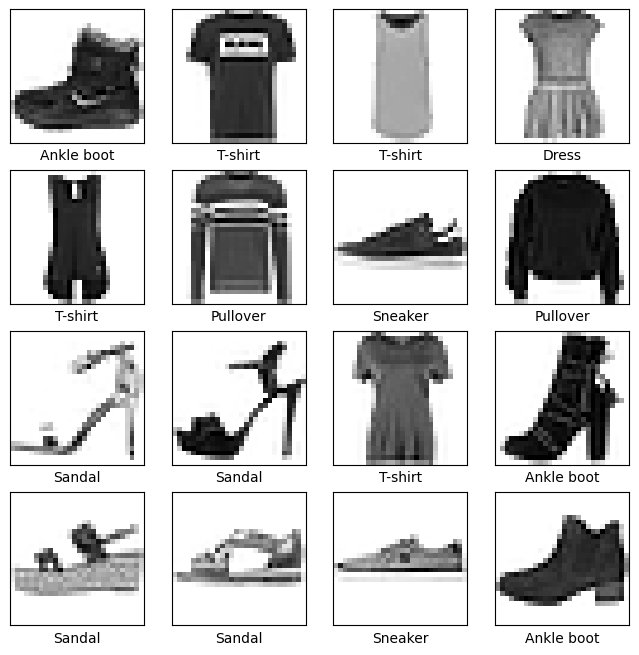

In [5]:
# store the label descriptions in a list to use in labelling the plotted images:
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# scale the pixel intensities from 0 to 255 to 0 to 1:
sample_images = []
for i in range(16):
    sample_images.append(X_train[i] / 255.0)

# make figure with the 16 images
plt.figure(figsize=(8,8))
for i in range(16):
    # position subplot in a 4x4 grid
    plt.subplot(4,4,i+1)

    # hide axes ticks and grid
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # show images with reverse gray color map
    plt.imshow(sample_images[i], cmap='gray_r')

    # add labels
    plt.xlabel(labels[y_train[i]])

# show the figure
plt.show()

## Artificial Neural Network Architecture

**Data Preprocessing:**

I plan to feed the data to a Dense layer, so the only data preprocessing we'll do is normalization.

In [6]:
X_train, X_test = X_train / 255., X_test / 255.

**Task:**

Let's first try a multilayer perceptron (also called ANN) without introducing convolutional layers.

**Strategy:**

We will use two hidden Dense layers with [ReLU activation](https://wandb.ai/ayush-thakur/dl-question-bank/reports/ReLU-vs-Sigmoid-Function-in-Deep-Neural-Networks--VmlldzoyMDk0MzI) and the final/output Dense layer will have [Softmax activation](https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9). Also, since the images are 28x28, we will have a Flatten layer to make it a 784 size vector.

In [7]:
# set TensorFlow's random seed to make the results reproducible
tf.random.set_seed(42)

# build a MLP 100-50
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 84060 (328.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compiling the model:**

After a model is created, we must call its `compile()` method to specify the loss function and the optimizer to use.

We will use the `"sparse_categorical_crossentropy"` loss because we have sparse labels (i.e., for each instance, there is just a target class
index, from 0 to 9 in this case), and the classes are exclusive. If we were doing binary classification or multilabel binary classification, then we would use the Sigmoid activation function in the output layer instead of the Softmax activation function, and we would use the `"binary_crossentropy"` loss.

For optimizer, we will use the SGD optimizer.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

**Training and evaluating the model**

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_split=0.1)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7922 - accuracy: 0.7385 - val_loss: 0.5342 - val_accuracy: 0.8178
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5071 - accuracy: 0.8229 - val_loss: 0.4742 - val_accuracy: 0.8290
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4597 - accuracy: 0.8389 - val_loss: 0.4351 - val_accuracy: 0.8456
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4346 - accuracy: 0.8476 - val_loss: 0.4128 - val_accuracy: 0.8554
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4137 - accuracy: 0.8555 - val_loss: 0.4067 - val_accuracy: 0.8526
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3978 - accuracy: 0.8604 - val_loss: 0.4086 - val_accuracy: 0.8546
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3864 - accuracy: 0.8643 - val_loss: 0.3832 - val_accuracy:

**Learning curves:**

The `fit()` method returns a History object containing a dictionary `history.history` containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set. We make the learning curves with it.

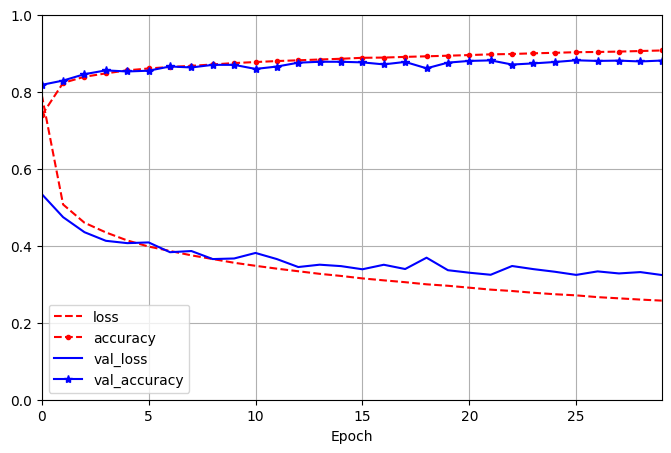

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1],
                                   grid=True, xlabel="Epoch",
                                   style=["r--", "r--.", "b-", "b-*"])
plt.show()

**Observation:** The accuracy curves are relatively close to each other at first, but they get further apart over time, which shows that there's a little bit of overfitting. In later stage, we may add regularization via Dropout layer(s).

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3452 - accuracy: 0.8760


[0.3452087640762329, 0.8759999871253967]

The model's test accuracy is about **88%**. This is same as what we got with a HOG-PCA-SVC machine learning model in [this Jupyter notebook](https://github.com/pranjal-s/machine-learning/blob/main/fashion_images_PCA_SVC_Classification.ipynb).

**Task:**

With deep learning, I expect to get better accuracy. Let's go for a convolutional NN architecture then.

## CNN Architecture

**Data Preprocessing:**

I plan to feed the data to a Conv2D layer, so apart from normalization, we also need to convert the 60000 28x28 images to a 60000x28x28x1 tensor.

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

**Strategy:**

Since it is a computer vision task, we can benefit from using Conv2D* layers.

Each convolutional layer will be followed by a MaxPool2D** layer with a 2x2 kernel as a downsampling filter and a Dropout layer to avoid overfitting by randomly ignoring some nodes i.e. regularization.

Finally, we would flatten the layer and use two Dense layers, first with ReLu activation and final one with SoftMax activation with 10 nodes for the class probabilities.

**Notes:**

*How can this be better than a deeper neural network with fully connected layers? Well, although ANNs can work fine for small images, they break down for larger images because of the huge number of parameters required. CNNs solve this problem using partially connected layers and weight sharing.

**A pooling neuron has no weights; all it does is aggregate the inputs using an aggregation function such as the max or mean.

In [14]:
# set TensorFlow's random seed to make the results reproducible
tf.random.set_seed(42)

# build a CNN with pooling and dropout
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 64)         

**Compiling the model:**

We will use the `"sparse_categorical_crossentropy"` loss because we still have sparse labels and the classes are exclusive.

For optimizer, I tried [RMSProp](https://www.ruder.io/optimizing-gradient-descent/) and it gave better accuracies on both training and validation sets than SGD for this CNN architecture.

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=["accuracy"])

**Training and evaluating the model**

In [16]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 72s 42ms/step - loss: 0.4687 - accuracy: 0.8305 - val_loss: 0.3130 - val_accuracy: 0.8835
Epoch 2/10
1688/1688 [==============================] - 76s 45ms/step - loss: 0.3156 - accuracy: 0.8850 - val_loss: 0.2830 - val_accuracy: 0.8942
Epoch 3/10
1688/1688 [==============================] - 80s 47ms/step - loss: 0.2801 - accuracy: 0.8979 - val_loss: 0.2769 - val_accuracy: 0.8997
Epoch 4/10
1688/1688 [==============================] - 77s 46ms/step - loss: 0.2624 - accuracy: 0.9038 - val_loss: 0.2641 - val_accuracy: 0.9023
Epoch 5/10
1688/1688 [==============================] - 72s 42ms/step - loss: 0.2509 - accuracy: 0.9079 - val_loss: 0.2415 - val_accuracy: 0.9127
Epoch 6/10
1688/1688 [==============================] - 74s 44ms/step - loss: 0.2452 - accuracy: 0.9121 - val_loss: 0.2570 - val_accuracy: 0.9095
Epoch 7/10
1688/1688 [==============================] - 74s 44ms/step - loss: 0.2397 - accuracy: 0.9152 - val_loss: 0.2474 -

**Learning curves:**

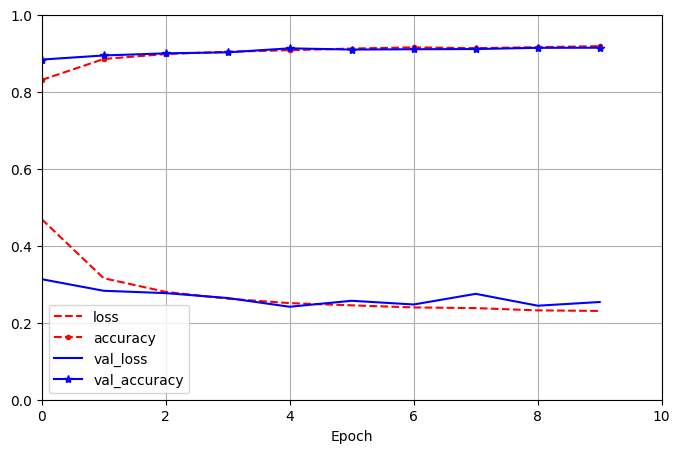

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 10], ylim=[0, 1],
                                   grid=True, xlabel="Epoch",
                                   style=["r--", "r--.", "b-", "b-*"])
plt.show()

**Observation:** The accuracy curves are relatively close to each other and don't get further apart over time, which shows that there's no overfitting.

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2608 - accuracy: 0.9127


[0.2608427107334137, 0.9126999974250793]

**Inspect classification confusions**

In [19]:
# make predictions
y_predicted = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


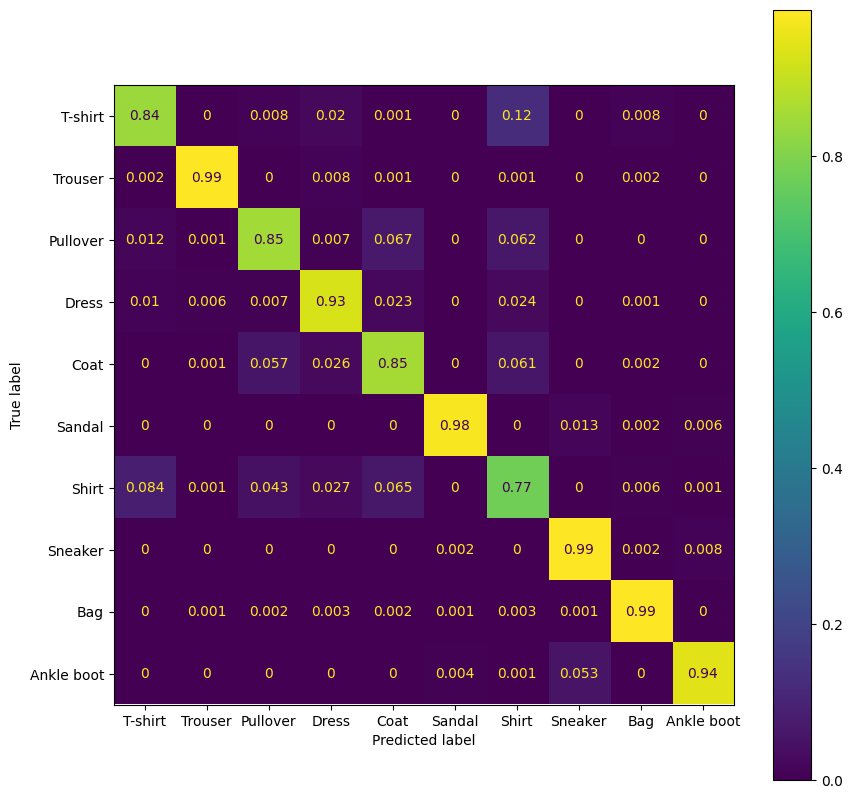

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(y_test, np.argmax(y_predicted,axis = 1), normalize='true', display_labels=labels, ax=ax)
plt.show()

**Observation:** Just like the ML model in the other notebook, this DL model is most confused among T-shirt, Pullover, and Coat and similarly there is small confusion among Trouser, Sandal, Sneaker, Ankle boot and Bag.

**Conclusion:**

Finally, we have a fine-tuned CNN model.

The classification accuracy on unseen images is is even better at about **91%**.

This is [much higher than human performance of **84%**](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#:~:text=%F0%9F%94%97-,Human%20Performance,-Crowd%2Dsourced%20evaluation) on the dataset.